**Merging transactions**

In [1]:
import pandas as pd

'''Only to be used if "all_tranformations.csv" does not exist.'''
# df = pd.read_csv("data/transactions_1.csv")
# df2 = pd.read_csv("data/transactions_2.csv")
# df3 = pd.read_csv("data/transactions_3.csv")

# #combining datasets in one CSV
# transactions=pd.concat([df,df2,df3], ignore_index = True)

# #saving to directory
# transactions.to_csv(r'data/all_transactions.csv', index = False)

'Only to be used if "all_tranformations.csv" does not exist.'

**Merging datagrames**

In [23]:
df = pd.read_csv("data/all_transactions.csv")
df2 = pd.read_csv("data/users.csv")
df3 = pd.read_csv("data/devices.csv")
df2 = pd.merge(df2, df3, on='user_id')
data = pd.merge(df2, df, on='user_id')
# df = pd.merge(df, df3, on='user_id')
# data = pd.merge(df, df2, on='user_id')

**Renaming columns**

In [24]:
data = data.rename(columns={"created_date_x": "user_created_date", "created_date_y": "transaction_created_date", "country": "user_country"})

**Removing unnecessary columns**

In [25]:
data = data.drop(['city', 'attributes_notifications_marketing_push', 'attributes_notifications_marketing_email', 'num_successful_referrals', 'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',], axis=1)

**Column Tranformations**

In [26]:
plan_ = {"STANDARD": 0,"SILVER": 1,"GOLD": 1}
data['plan'] = data['plan'].map(plan_)

In [27]:
currency_ = {'AED' : 0, 'SEK' : 0, 'AUD' : 0, 'GBP' : 0, 'ETH' : 1, 'RUB' : 0, 'CHF' : 0, 'HRK' : 0, 'LTC' : 1, 'MAD' : 0, 'BTC' : 1, 'NZD' : 0, 'JPY' : 0, 'ILS' : 0, 'QAR' : 0, 'MXN' : 0, 'DKK' : 0, 'SGD' : 0, 'ZAR' : 0, 'BGN' : 0, 'USD' : 0, 'INR' : 0, 'THB' : 0, 'RON' : 0, 'HUF' : 0, 'TRY' : 0, 'XRP' : 1, 'PLN' : 0, 'EUR' : 0, 'BCH' : 1, 'CZK' : 0, 'CAD' : 0, 'NOK' : 0, 'HKD' : 0, 'SAR' : 0}
data['transactions_currency'] = data['transactions_currency'].map(currency_)

**Plots**

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

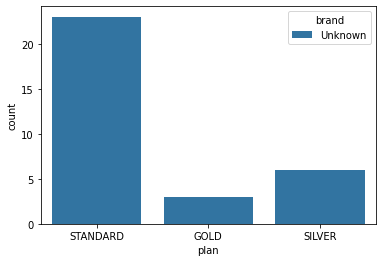

In [20]:
sns.countplot(x='plan', data=df2, hue='brand')

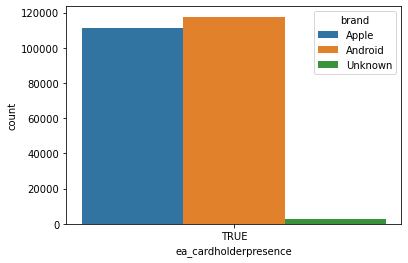

In [16]:
sns.countplot(x='ea_cardholderpresence', data=test, hue='brand')

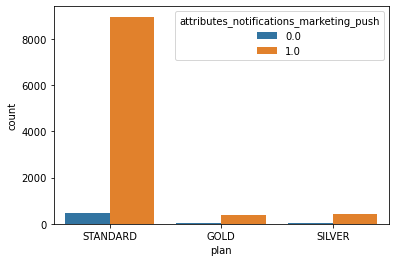

In [28]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_push')

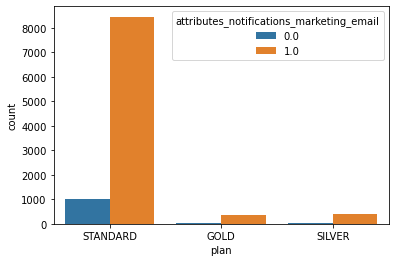

In [29]:
sns.countplot(x='plan', data=df2, hue='attributes_notifications_marketing_email')

**Tests and raw code**

In [14]:
test = data[data["ea_cardholderpresence"] == "TRUE"]

In [ ]:
df2 = df2[df2['brand'] == 'Unknown']

In [ ]:
data["ea_cardholderpresence"].value_counts()

In [19]:
data["ea_cardholderpresence"].value_counts()

In [13]:
data["ea_cardholderpresence"].value_counts()

FALSE      1012235
TRUE        231311
UNKNOWN       4274
Name: ea_cardholderpresence, dtype: int64